## NYC Property Sales Introduction

The aim of this projects is to introduce you to practical statistic with Python as concrete and as consistent as possible. Using what you’ve learned; download the NYC Property Sales Dataset from Kaggle. This dataset is a record of every building or building unit (apartment, etc.) sold in the New York City property market over a 12-month period.

This dataset contains the location, address, type, sale price, and sale date of building units sold. A reference on the trickier fields:

BOROUGH: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).
BLOCK; LOT: The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL.
BUILDING CLASS AT PRESENT and BUILDING CLASS AT TIME OF SALE: The type of building at various points in time.

Note that because this is a financial transaction dataset, there are some points that need to be kept in mind:

Many sales occur with a nonsensically small dollar amount: $0 most commonly. These sales are actually transfers of deeds between parties: for example, parents transferring ownership to their home to a child after moving out for retirement.
This dataset uses the financial definition of a building/building unit, for tax purposes. In case a single entity owns the building in question, a sale covers the value of the entire building. In case a building is owned piecemeal by its residents (a condominium), a sale refers to a single apartment (or group of apartments) owned by some individual.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statistics
import scipy.stats
import matplotlib.pyplot as plt
from scipy.stats import uniform, norm, gamma,expon, poisson, binom, bernoulli,ttest_1samp

In [2]:
# load dataset
df_nyc= pd.read_csv("dataset/nyc-rolling-sales.csv")
df_nyc.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [3]:
# tail
df_nyc.tail()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,...,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


BOROUGH: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).

In [4]:
df_nyc.shape

(84548, 22)

In [5]:
# drop Unnamed and Ease Ment
df_nyc.drop(['Unnamed: 0', 'EASE-MENT'], axis='columns', inplace=True)

According to this official page, Ease-ment is "is a right, such as a right of way, which allows an entity to make limited use of another’s real property. For example: MTA railroad tracks that run across a portion of another property". Also, the Unnamed column is not mentioned and was likely used for iterating through records. So, those two columns are removed for now.

In [6]:
df_nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   LOT                             84548 non-null  int64 
 6   BUILDING CLASS AT PRESENT       84548 non-null  object
 7   ADDRESS                         84548 non-null  object
 8   APARTMENT NUMBER                84548 non-null  object
 9   ZIP CODE                        84548 non-null  int64 
 10  RESIDENTIAL UNITS               84548 non-null  int64 
 11  COMMERCIAL UNITS                84548 non-null  int64 
 12  TOTAL UNITS                     84548 non-null

In [7]:
#First, let's check which columns should be categorical
print('Column name')
for col in df_nyc.columns:
    if df_nyc[col].dtype=='object':
        print(col, df_nyc[col].nunique())

Column name
NEIGHBORHOOD 254
BUILDING CLASS CATEGORY 47
TAX CLASS AT PRESENT 11
BUILDING CLASS AT PRESENT 167
ADDRESS 67563
APARTMENT NUMBER 3989
LAND SQUARE FEET 6062
GROSS SQUARE FEET 5691
BUILDING CLASS AT TIME OF SALE 166
SALE PRICE 10008
SALE DATE 364


In [8]:
# LAND SQUARE FEET,GROSS SQUARE FEET, SALE PRICE, BOROUGH should be numeric. 
# SALE DATE datetime format.
# categorical: NEIGHBORHOOD, BUILDING CLASS CATEGORY, TAX CLASS AT PRESENT, BUILDING CLASS AT PRESENT,
# BUILDING CLASS AT TIME OF SALE, TAX CLASS AT TIME OF SALE,BOROUGH 

numer = ['LAND SQUARE FEET','GROSS SQUARE FEET', 'SALE PRICE', 'BOROUGH']
for col in numer: # coerce for missing values
    df_nyc[col] = pd.to_numeric(df_nyc[col], errors='coerce')

categ = ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE']
for col in categ:
    df_nyc[col] = df_nyc[col].astype('category')

df_nyc['SALE DATE'] = pd.to_datetime(df_nyc['SALE DATE'], errors='coerce')

In [9]:
missing = df_nyc.isnull().sum()/len(df_nyc)*100

print(pd.DataFrame([missing[missing>0],pd.Series(df_nyc.isnull().sum()[df_nyc.isnull().sum()>1000])], index=['percent missing','how many missing']))

                  LAND SQUARE FEET  GROSS SQUARE FEET   SALE PRICE
percent missing          31.049818          32.658372     17.22217
how many missing      26252.000000       27612.000000  14561.00000


Around 30% of GROSS SF and LAND SF are missing. Furthermore, around 17% of SALE PRICE is also missing.

We can fill in the missing value from one column to another, which will help us reduce missing values. Expected values:

(6, 20)

(1366, 20)

In [10]:
print(df_nyc[(df_nyc['LAND SQUARE FEET'].isnull()) & (df_nyc['GROSS SQUARE FEET'].notnull())].shape)
print(df_nyc[(df_nyc['LAND SQUARE FEET'].notnull()) & (df_nyc['GROSS SQUARE FEET'].isnull())].shape)

(6, 20)
(1366, 20)


There are 1372 rows that can be filled in with their approximate values.

In [11]:
df_nyc['LAND SQUARE FEET'] = df_nyc['LAND SQUARE FEET'].mask((df_nyc['LAND SQUARE FEET'].isnull()) & (df_nyc['GROSS SQUARE FEET'].notnull()), df_nyc['GROSS SQUARE FEET'])
df_nyc['GROSS SQUARE FEET'] = df_nyc['GROSS SQUARE FEET'].mask((df_nyc['LAND SQUARE FEET'].notnull()) & (df_nyc['GROSS SQUARE FEET'].isnull()), df_nyc['LAND SQUARE FEET'])

In [12]:
#  Check for duplicates before

print(sum(df_nyc.duplicated()))

df_nyc[df_nyc.duplicated(keep=False)].sort_values(['NEIGHBORHOOD', 'ADDRESS']).head(10)

# df.duplicated() automatically excludes duplicates, to keep duplicates in df we use keep=False

# in df.duplicated(df.columns) we can specify column names to look for duplicates only in those mentioned columns.

765


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
76286,5,ANNADALE,02 TWO FAMILY DWELLINGS,1,6350,7,B2,106 BENNETT PLACE,,10312,2,0,2,8000.0,4208.0,1985,1,B2,NaN,2017-06-27
76287,5,ANNADALE,02 TWO FAMILY DWELLINGS,1,6350,7,B2,106 BENNETT PLACE,,10312,2,0,2,8000.0,4208.0,1985,1,B2,NaN,2017-06-27
76322,5,ANNADALE,05 TAX CLASS 1 VACANT LAND,1B,6459,28,V0,N/A HYLAN BOULEVARD,,0,0,0,0,6667.0,6667.0,0,1,V0,NaN,2017-05-11
76323,5,ANNADALE,05 TAX CLASS 1 VACANT LAND,1B,6459,28,V0,N/A HYLAN BOULEVARD,,0,0,0,0,6667.0,6667.0,0,1,V0,NaN,2017-05-11
76383,5,ARDEN HEIGHTS,01 ONE FAMILY DWELLINGS,1,5741,93,A5,266 ILYSSA WAY,,10312,1,0,1,500.0,1354.0,1996,1,A5,320000.0,2017-06-06
76384,5,ARDEN HEIGHTS,01 ONE FAMILY DWELLINGS,1,5741,93,A5,266 ILYSSA WAY,,10312,1,0,1,500.0,1354.0,1996,1,A5,320000.0,2017-06-06
76643,5,ARROCHAR,02 TWO FAMILY DWELLINGS,1,3103,57,B2,129 MC CLEAN AVENUE,,10305,2,0,2,5000.0,2733.0,1925,1,B2,NaN,2017-03-21
76644,5,ARROCHAR,02 TWO FAMILY DWELLINGS,1,3103,57,B2,129 MC CLEAN AVENUE,,10305,2,0,2,5000.0,2733.0,1925,1,B2,NaN,2017-03-21
50126,4,ASTORIA,03 THREE FAMILY DWELLINGS,1,856,139,C0,22-18 27TH STREET,,11105,3,0,3,2000.0,1400.0,1930,1,C0,NaN,2017-01-12
50127,4,ASTORIA,03 THREE FAMILY DWELLINGS,1,856,139,C0,22-18 27TH STREET,,11105,3,0,3,2000.0,1400.0,1930,1,C0,NaN,2017-01-12


The dataframe has 765 duplicated rows (exluding the original rows).

In [13]:
df_nyc.drop_duplicates(inplace=True)

print(sum(df_nyc.duplicated()))

0


## **Exploratory data analysis**

Now, let's get a simple descriptive statistics with .describe() function for COMMERCIAL UNITS features.

In [14]:
df_nyc[df_nyc['COMMERCIAL UNITS']==0].describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,78777.000000,78777.000000,78777.000000,78777.000000,78777.000000,78777.0,78777.000000,5.278000e+04,5.278000e+04,78777.000000,6.562900e+04
mean,3.004329,4273.781015,395.422420,10722.737068,1.691737,0.0,1.724133,3.140140e+03,2.714612e+03,1781.065451,9.952969e+05
std,1.298594,3589.241940,671.604654,1318.493961,9.838994,0.0,9.835016,2.929999e+04,2.791294e+04,551.024570,3.329268e+06
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,2.000000,1330.000000,23.000000,10304.000000,0.000000,0.0,1.000000,1.600000e+03,9.750000e+02,1920.000000,2.400000e+05
50%,3.000000,3340.000000,52.000000,11209.000000,1.000000,0.0,1.000000,2.295000e+03,1.600000e+03,1940.000000,5.294900e+05
75%,4.000000,6361.000000,1003.000000,11357.000000,2.000000,0.0,2.000000,3.300000e+03,2.388000e+03,1967.000000,9.219560e+05
max,5.000000,16322.000000,9106.000000,11694.000000,889.000000,0.0,889.000000,4.252327e+06,4.252327e+06,2017.000000,3.450000e+08


Let us try to understand the columns. Above table shows descriptive statistics for the numeric columns.

- There are zipcodes with 0 value
- Can block/lot numbers go up to 16322?
- Most of the properties have 2 unit and maximum of 1844 units? The latter might mean some company purchased a building. This should be treated as an outlier.
- Other columns also have outliers which needs further investigation.
- Year column has a year with 0
- Most sales prices less than 10000 can be treated as gift or transfer fees.
Now, let's get a simple descriptive statistics with .describe() function for RESIDENTIAL UNITS features.

Function below are graded function. (1 Points)

In [15]:
df_nyc[df_nyc['RESIDENTIAL UNITS']==0].describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,24546.000000,24546.000000,24546.000000,24546.000000,24546.0,24546.000000,24546.000000,9.503000e+03,9.503000e+03,24546.000000,2.085500e+04
mean,2.542084,3355.267172,283.943412,10321.514626,0.0,0.459382,0.563350,7.416797e+03,8.870466e+03,1675.525788,1.632257e+06
std,1.334486,3091.222257,570.045258,2135.406385,0.0,15.826020,15.825945,8.032892e+04,7.890877e+04,679.095000,1.969307e+07
min,1.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,1.000000,1158.000000,12.000000,10023.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,1921.000000,1.825000e+05
50%,3.000000,1947.000000,38.000000,11004.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,1950.000000,3.950000e+05
75%,4.000000,5390.750000,135.000000,11354.000000,0.0,0.000000,0.000000,3.250000e+03,2.500000e+03,1962.000000,8.500000e+05
max,5.000000,16317.000000,9056.000000,11694.000000,0.0,2261.000000,2261.000000,4.252327e+06,4.252327e+06,2017.000000,2.210000e+09


In [16]:
df_nyc["BOROUGH"].value_counts()

4    26548
3    23843
1    18102
5     8296
2     6994
Name: BOROUGH, dtype: int64

Write your findings below:

Use .value_counts function to count total value of BOROUGH features. Expected value:

4 26548\ 3 23843\ 1 18102\ 5 8296\ 2 6994\ Name: BOROUGH, dtype: int64

## Mean

In [17]:
mean_borough = df_nyc["BOROUGH"].mean()
np_mean_borough = np.mean(df_nyc["BOROUGH"])
print("mean of borough:",mean_borough)
print("numpy array mean:",np_mean_borough)

mean of borough: 2.999307735459461
numpy array mean: 2.999307735459461


From here, we can calculate the mean for each Borough. Use .mean() function to calculate mean.

In [18]:
# rata-rata total unit bangunan 2000
total_sale_00 = df_nyc[df_nyc["YEAR BUILT"] == 2000]
total_sales_old_00 = total_sale_00["TOTAL UNITS"].mean()
print("Rata-rata total unit bangunan tahun 2000: ",total_sales_old_00)

Rata-rata total unit bangunan tahun 2000:  1.92


From here, we can calculate the mean for each total unit 2000. Use .mean() function to calculate mean.

## Median

In [19]:
np_median_borough = np.median(df_nyc["BOROUGH"])
print("median of borough:",np_median_borough)

median of borough: 3.0


From here, we can calculate the median for each Borough. Use .median() function to calculate median.

In [20]:
# median total unit bangunan 2000
total_sale_00 = df_nyc[df_nyc["YEAR BUILT"] == 2000]
total_sales_old_00_med = total_sale_00["TOTAL UNITS"].median()
print("Median total unit bangunan tahun 2000: ",total_sales_old_00_med)

Median total unit bangunan tahun 2000:  1.0


From here, we can calculate the median for each total units 2000. Use .median() function to calculate median.

## Mode

In [21]:
mode_borough = scipy.stats.mode(df_nyc["BOROUGH"])
print("mode_borough: ",mode_borough)

mode_borough:  ModeResult(mode=array([4], dtype=int64), count=array([26548]))


From here, we can calculate the mode for each Borough.

In [22]:
# modus total unit bangunan 2000
total_sale_00 = df_nyc[df_nyc["YEAR BUILT"] == 2000]
total_sales_old_00_mod = scipy.stats.mode(total_sale_00["TOTAL UNITS"])
print("Mode total unit bangunan tahun 2000: ",total_sales_old_00_mod)

Mode total unit bangunan tahun 2000:  ModeResult(mode=array([1], dtype=int64), count=array([116]))


From here, we can calculate the mode for each total units 2000

## Range

In [23]:
max_borough = max(df_nyc["BOROUGH"])
min_borough = min(df_nyc["BOROUGH"])
print("max borough:", max_borough,",", "min borough:", min_borough)

max borough: 5 , min borough: 1


In [24]:
range_borough = max_borough - min_borough
print("range borough:", range_borough)

range borough: 4


From here, we can calculate the Range for each Borough.

In [25]:
total_sale_00 = df_nyc[df_nyc["YEAR BUILT"] == 2000]
max_00 = max(total_sale_00["TOTAL UNITS"])
min_00 = min(total_sale_00["TOTAL UNITS"])
print("max total 2000:", max_00,",", "min total 2000:", min_00)

max total 2000: 81 , min total 2000: 0


In [26]:
# range total unit bangunan 2000
range_00 = max_00 - min_00
print("range total unit building 2000:", range_00)

range total unit building 2000: 81


From here, we can calculate the Range for each total units 2000.

## Variance

In [27]:
np_var_borough = np.var(df_nyc["BOROUGH"], ddof=1)
stats_var_borough = statistics.variance(df_nyc["BOROUGH"])
print("numpy var borough:", np_var_borough)
print("statistic var borough:", stats_var_borough)

numpy var borough: 1.6606664898027819
statistic var borough: 1.6606664898027816


From here, we can calculate the Variance for each Borough.

Function below are graded function. (1 Points)

In [28]:
# Variance total unit bangunan 2000
total_sale_00 = df_nyc[df_nyc["YEAR BUILT"] == 2000]
stats_var_00 = statistics.variance(total_sale_00["TOTAL UNITS"])
print("Variance total unit bangunan 2000 :",stats_var_00)

Variance total unit bangunan 2000 : 29.26142857142857


## Standard Deviation

In [29]:
np_std_borough = np.std(df_nyc["BOROUGH"],ddof=1)
print("numpy std borough:", np_std_borough)

numpy std borough: 1.2886684949213207


From here, we can calculate the SD for each Borough.

Function below are graded function

In [30]:
# STD total unit bangunan 2000
total_sale_00 = df_nyc[df_nyc["YEAR BUILT"] == 2000]
sd00 =  np.std(total_sale_00["TOTAL UNITS"],ddof=1)
print("Standard Deviasi 2000 :",sd00)

Standard Deviasi 2000 : 5.4093833818124395


## Probability Distribution

**Data Total Unit untuk tahun 2000**
tahun 2000:mean : 1.92,standard deviasi : 5.41 ,total keseluruhan (n) : 225

#### 1. normal distribution

[-2.68033292 -0.12392158  1.7133604  ... 15.63467469  7.50334634
 14.71932362]


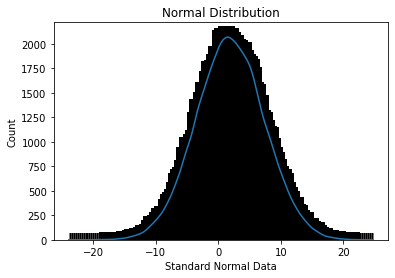

In [31]:
# normal distribution
data_normal = norm.rvs(size=84548, loc=1.92, scale=5.41)
print(data_normal)
#where loc is the mean and scale is the std dev
sns.histplot(x = data_normal,
                  kde=True,
                  alpha =1,linewidth=15)
plt.xlabel("Standard Normal Data")
plt.ylabel("Count")
plt.title("Normal Distribution")
plt.show()

#### 2. Exponential Distribution

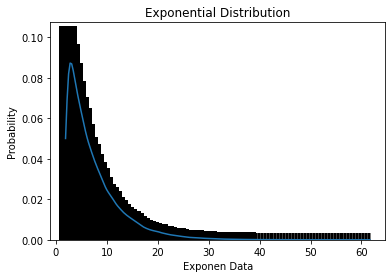

In [32]:
# exponential distribution
data_expon = expon.rvs(size=84548, loc=1.92, scale=5.41)
#where loc is the mean and scale is the std dev
sns.histplot(x = data_expon,
                  stat='probability',
                  kde=True,
                  bins=100,
                  alpha =1,linewidth=15)
plt.xlabel("Exponen Data")
plt.ylabel("Probability")
plt.title("Exponential Distribution")
plt.show()

### 3. Poison Distribution

[2 7 1 ... 1 0 0]


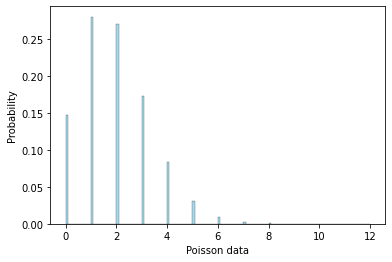

In [33]:
# poison distribution
data_poisson = poisson.rvs(mu=1.92, size =84548)
print(data_poisson)

sns.histplot(x=data_poisson, stat="probability", color="skyblue",
            )
plt.xlabel("Poisson data")
plt.ylabel("Probability")
plt.show()

### **Data Borough**

#### 1. Normal Distribution

[4.02135314 3.35772082 1.11270825 ... 1.48319642 2.81350003 4.03918994]


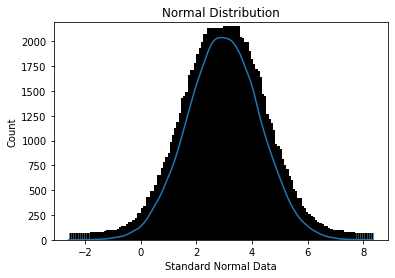

In [34]:
# normal distribution
data_normal = norm.rvs(size=84548, loc=2.99, scale=1.29)
print(data_normal)
#where loc is the mean and scale is the std dev
sns.histplot(x = data_normal,
                  kde=True,
                  alpha =1,linewidth=15)
plt.xlabel("Standard Normal Data")
plt.ylabel("Count")
plt.title("Normal Distribution")
plt.show()

#### 2. Uniform Distribution

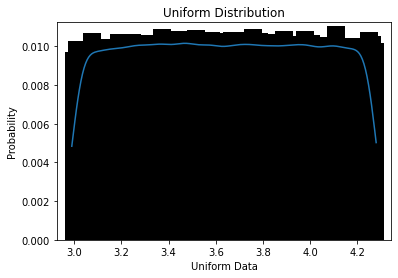

In [35]:
data_uniform = uniform.rvs(size=84548, loc=2.99, scale=1.29)
#where loc is the mean and scale is the std dev
sns.histplot(x = data_uniform,
                  stat='probability',
                  kde=True,
                  bins=100,
                  alpha =1,linewidth=15)
plt.xlabel("Uniform Data")
plt.ylabel("Probability")
plt.title("Uniform Distribution")
plt.show()

#### 3. Exponential Distribution

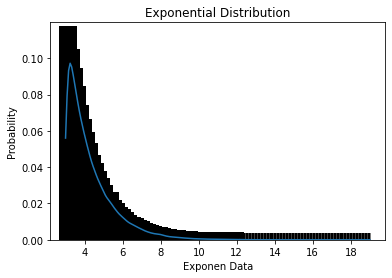

In [36]:
data_expon = expon.rvs(size=84548, loc=2.99, scale=1.29)
#where loc is the mean and scale is the std dev
sns.histplot(x = data_expon,
                  stat='probability',
                  kde=True,
                  bins=100,
                  alpha =1,linewidth=15)
plt.xlabel("Exponen Data")
plt.ylabel("Probability")
plt.title("Exponential Distribution")
plt.show()

#### 4. Poisson Distribution

[3 2 0 ... 5 2 2]


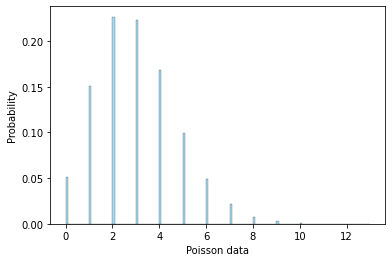

In [37]:
data_poisson = poisson.rvs(mu=2.99, size =84548)
print(data_poisson)

sns.histplot(x=data_poisson, stat="probability", color="skyblue",
            )
plt.xlabel("Poisson data")
plt.ylabel("Probability")
plt.show()

## Confidence Intervals

Rata-rata total unit yang dimiliki oleh seseorang diperkirakan adalah 2 unit. Selang kepercayaannya adalah 95%

In [38]:
# CI untuk data total units

data = df_nyc["TOTAL UNITS"]
#create 95% confidence interval for population mean weight
scipy.stats.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=scipy.stats.sem(data)) 

(2.0863530352725617, 2.3406548302848904)

In [39]:
# CI untuk data year built

data = df_nyc["YEAR BUILT"]
#create 95% confidence interval for population mean weight
scipy.stats.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=scipy.stats.sem(data)) 

(1786.1810385705558, 1793.4475973102317)

In [40]:
# CI untuk data borough

data = df_nyc["BOROUGH"]
#create 95% confidence interval for population mean weight
scipy.stats.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=scipy.stats.sem(data)) 

(2.9905816869542217, 3.0080337839647)

## Kasus Kedua CI

kita akan mencari CI untuk data total unit untuk bangunan tahun 1990 dan 2000.
tahun 1990 :
- mean : 1.55
- standard deviasi : 4.35
- total keseluruhan (n) : 324

tahun 2000:
- mean : 1.92
- standard deviasi : 5.41
- total keseluruhan (n) : 225

In [41]:
np.random.seed(42)
normal_distribution_90 = np.random.normal(loc=1.55, scale=4.35,size=324)
normal_distribution_00 = np.random.normal(loc=1.92, scale=5.41,size=225)
#225, 1.92, 5.4093833818124395
all_mass_values = np.concatenate((normal_distribution_90,normal_distribution_00), axis=0)
df_ttl_year = pd.DataFrame(data={"total unit year built": all_mass_values})
df_ttl_year.head()

,total unit year built
0,3.710707
1,0.948550
2,4.367445
3,8.175180
4,0.531433


In [42]:
# shape
df_ttl_year.shape

(549, 1)

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of year built')

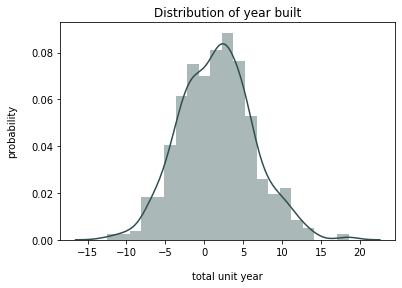

In [43]:
# plot data
sns.distplot(df_ttl_year["total unit year built"],color="darkslategrey")
plt.xlabel("total unit year", labelpad=14)
plt.ylabel("probability", labelpad=14)
plt.title("Distribution of year built")

In [44]:
# mean dari data df_ttl_year
pop_mean = df_ttl_year["total unit year built"].mean()
pop_mean

1.6026449151169566

In [45]:
# std dari data df_ttl_year
pop_std_dev = df_ttl_year["total unit year built"].std()
pop_std_dev

4.707350384036032

In [46]:
# standard error 
standard_error = pop_std_dev/np.sqrt(549)
standard_error

0.2009048186409644

In [47]:
# nilai interval CI
lower_CI = pop_mean - 1.96*standard_error
print("lower_CI:",lower_CI)

upper_CI = pop_mean + 1.96*standard_error
print("upper_CI:",upper_CI)

lower_CI: 1.2088714705806665
upper_CI: 1.9964183596532468


### **insight :**
selang kepercayaan terhadap total unit untuk bangunan tahun 1990 dan 2000 adalah lower CI nya dengan nilai interval 1.21 hingga 1.99

## Hypothesis Testing

**Null Hypothesis** : Pada tahun-tahun sebelumnya, 52% orang dewasa percaya bahwa orang yang bergaji tinggi lebih memilih tinggal di rumah (one family dwelling) dibanding kan dengan di condos elevator apartment (p=0.52)

**Hypothesis alternative**: p>0.52, dari hasil 1000 orang disurvei, 56% dari mereka yang disurvei percaya bahwa orang yang bergaji tinggi lebih memilih tinggal di rumah (one family dwelling) dibanding kan dengan di condos elevator apartment.

In [48]:
# uji hipotesis menggunakan proportion ztest dari statsmodel
n =1000
p_null =.52
p_alternate =.56

sm.stats.proportions_ztest(p_alternate * n, n, p_null, alternative="larger")

(2.54823595718813, 0.005413460638565616)

### Insight:
karena nilai p-value dari z-test lebih besar dari H0, maka kita akan **tolak H0** dan menerima hipotesis alternatif. Bahwa 56% dari mereka yang disurvei percaya bahwa orang yang bergaji tinggi lebih memilih tinggal di rumah (one family dwelling) dibanding kan dengan di condos elevator apartment.

### **Uji Hipotesis 2**
Kita akan uji apakah rata-rata dari Borough adalah sama dengan 3?
- Null hypothesis adalah rata-rata Borough adalah 3 (H0=3)
- Hypothesis Alternative tidak sama dengan 3

In [49]:
total = df_nyc["BOROUGH"]
#print(total_sales_00)
borough_mean = df_nyc["BOROUGH"].mean()
print(borough_mean)
tset, pval = ttest_1samp(total,3 )
print("p-values",pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
   print(" we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")

2.999307735459461
p-values 0.8764336149652546
we are accepting null hypothesis


**Insight**: Hasilnya menyatakan rata-rata Borough adalah 3 berarti menerima hipotesis 0. Dikarenakan p-values = 0.8764336149652546 lebih besar dari 0.05.

## Final Conclusion

Kesimpulan dari hasil perhitungan statistik di atas adalah diketahui rata-rata untuk kolom Borough adalah 2.999. Nilai median pada kolom Borough adalah 3.0 yaitu Brooklyn. Sedangkan untuk nilai modus bernilai 4 yaitu Queens. Rangenya untuk Borough bernilai 4. Variance yang dimiliki Borough adalah 1.66 dan Standar Deviasi adalah 1.28. 

Sedangkan untuk total unit bangunan tahun 2000, rata-ratanya adalah 1.92, nilai median adalah 1 dan Modenya adalah 1. Range untuk total unit bangunan tahun 200 adalah 81 dan variancenya adalah 29.26. Standar Deviasinya adalah 5.41

untuk melihat persebaran data Borough dapat menggunakan distribusi probabilitas Borough, Distribusi probabilitas yang digunakan adalah normal distribution, nilai yang digunakan adalah n = 84548, mean = 2.99 dan  std=1.29. Berdasarkan hasil kurva yang ditunjukkan diketahui kurva berbentuk Leptokurtic (More values in the distribution tails and more values close to the mean (i.e. sharply peaked with heavy tails). 

Sedangkan distributsi probabilitas untuk total unit bangunan tahun 2000.Distribusi probabilitas yang digunakan adalah normal distribution, nilai yang digunakan adalah n = 84548, mean = 1.92 dan  std=5.41. Berdasarkan hasil kurva yang ditunjukkan diketahui kurva berbentuk Leptokurtic (More values in the distribution tails and more values close to the mean (i.e. sharply peaked with heavy tails). 

Perhitungan CI pada kasus yang total unit tiap bangunan tahun 1990 dan 2000, diketahui selang kepercayaan terhadap total unit untuk bangunan tahun 1990 dan 2000 adalah lower CI nya dengan nilai interval 1.21 hingga 1.99.

Sedangkan untuk kasus uji hipotesis menggunakan propotions z-test. Dari hasil perhitungan tersebut menolak H0 dan menerima H1. Bahwa 56% dari mereka yang disurvei percaya bahwa orang yang bergaji tinggi lebih memilih tinggal di rumah (one family dwelling) dibanding kan dengan di condos elevator apartment.

untuk kasus kedua uji hipotesis yang digunakan adalah menggunakan t-test untuk menguji kebenaran dari rata-rata data Borough, apakah bernilai 3 (h0=3) atau tidak sama dengan 3. Dan hasilnya adalah menerima null hipotesis (h0=3) dikarenakan p-values = 0.8764336149652546 lebih besar dari 0.05.

## ====Tambahan Code===

In [50]:
total_sale_90 = df_nyc[df_nyc["YEAR BUILT"] == 1990]
total_sales_old_90 = total_sale_90["TOTAL UNITS"].mean()
total_sales_old_90

1.5524691358024691

In [51]:
total_sale_91 = df_nyc[df_nyc["YEAR BUILT"] == 1991]
total_sales_old_91 = total_sale_91["TOTAL UNITS"].mean()
total_sales_old_91

2.515873015873016

In [52]:
total_sale_00 = df_nyc[df_nyc["YEAR BUILT"] == 2000]
total_sales_old_00 = total_sale_00["TOTAL UNITS"].mean()
total_sales_old_00

1.92

In [53]:
total_sale_01 = df_nyc[df_nyc["YEAR BUILT"] == 2001]
total_sales_old_01 = total_sale_01["TOTAL UNITS"].mean()
total_sales_old_01

1.879245283018868

In [54]:
df_building =pd.DataFrame({"Year Build":[1990, 2000, 2001],
                          "Total Sales Price":[179391936,198719744,171229098]})
df_building

,Year Build,Total Sales Price
0,1990,179391936
1,2000,198719744
2,2001,171229098


In [55]:
n90 = len(df_nyc[df_nyc["YEAR BUILT"] == 1990])
mean_90 = 1.55
sd90 =  np.std(total_sale_90["TOTAL UNITS"],ddof=1)
(n90, mean_90, sd90)
#np.std(df_nyc["BOROUGH"],ddof=1)

(324, 1.55, 4.347914351682973)

In [56]:
n00 = len(df_nyc[df_nyc["YEAR BUILT"] == 2000])
mean_00 = 1.92
sd00 =  np.std(total_sale_00["TOTAL UNITS"],ddof=1)
(n00, mean_00, sd00)

(225, 1.92, 5.4093833818124395)

In [57]:
df_nyc["BUILDING CLASS CATEGORY"].value_counts()

01 ONE FAMILY DWELLINGS                         18107
02 TWO FAMILY DWELLINGS                         15700
13 CONDOS - ELEVATOR APARTMENTS                 12929
10 COOPS - ELEVATOR APARTMENTS                  12876
03 THREE FAMILY DWELLINGS                        4342
07 RENTALS - WALKUP APARTMENTS                   3395
09 COOPS - WALKUP APARTMENTS                     2764
04 TAX CLASS 1 CONDOS                            1652
44 CONDO PARKING                                 1437
15 CONDOS - 2-10 UNIT RESIDENTIAL                1274
05 TAX CLASS 1 VACANT LAND                       1221
17 CONDO COOPS                                   1199
22 STORE BUILDINGS                                918
12 CONDOS - WALKUP APARTMENTS                     871
14 RENTALS - 4-10 UNIT                            662
29 COMMERCIAL GARAGES                             578
43 CONDO OFFICE BUILDINGS                         466
31 COMMERCIAL VACANT LAND                         442
47 CONDO NON-BUSINESS STORAG

Faktanya rata - rata total unit bangunan tahun 1990 yang terjual senilai 1.55 unit. Diperkirakan bangunan tahun 2000 pasti memiliki rata-rata total unit terjual lebih tinggi dibandingkan tahun 90.

tahun 2000:

- mean : 1.92
- standard deviasi : 5.41
- total keseluruhan (n) : 225

In [58]:
#n = 84548/2
#n
#https://wiki.analytica.com/index.php?title=Gamma_distribution
#data_gamma = gamma.rvs(a=5, size =84548)
#print(data_gamma)

#sns.histplot(x=data_gamma, stat="probability", bins= 100, kde= True, color="skyblue",
#            alpha =1, linewidth=15)
#plt.xlabel("data_gamma")
#plt.ylabel("Probability")
#plt.show()